#RAVITEJA Y S - 213010042
#SHREYAS G S - 213010040

# Non-linear dimension reduction: 
a. Visualize the data from the file DataKPCA.csv.

b. Train KPCA. 

c. Plot the variance explained versus KPCA dimensions for up to 10 dimensions. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
raw_data = pd.read_csv('/content/DataKPCA.csv')
#here we have imported the data from the file

In [ ]:
raw_data

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


In [ ]:
print(raw_data.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_data)
scaled_data = scaler.transform(raw_data)
#here we are scaling the data that is required for training the data with KPCA package

In [ ]:
scaled_data

array([[0.22135185, 0.51403226, 0.5427103 , ..., 0.51003232, 0.22362386,
        0.48699767],
       [0.39625764, 0.4473174 , 0.38638555, ..., 0.5274    , 0.12177749,
        0.28100555],
       [0.48865953, 0.44593896, 0.27894577, ..., 0.70177346, 0.00373942,
        0.49092688],
       ...,
       [0.55293773, 0.40581928, 0.260674  , ..., 0.66198254, 0.00263349,
        0.33516256],
       [0.55977728, 0.33026684, 0.30716053, ..., 0.57140265, 0.02818208,
        0.2677463 ],
       [0.61412196, 0.311483  , 0.28366295, ..., 0.55270268, 0.02874758,
        0.24445925]])

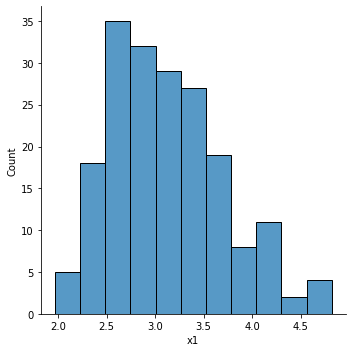

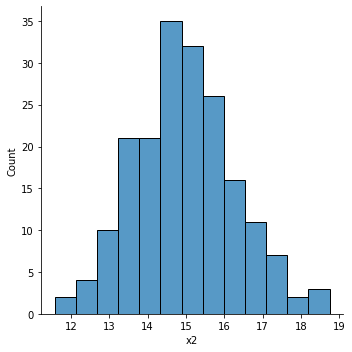

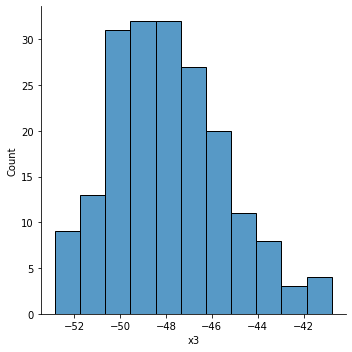

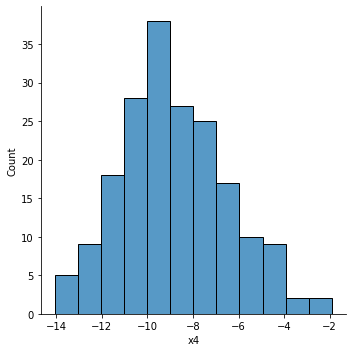

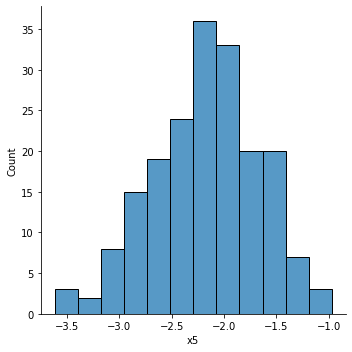

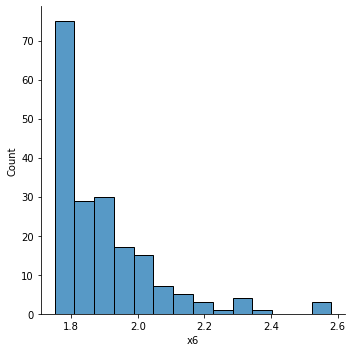

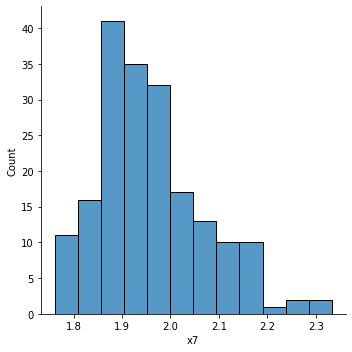

In [ ]:
for column in raw_data:
  sns.displot(x=column, data=raw_data)

Performing the Data Visualizing using the distribution plot. As we can see that the distribution plot for all the features of the data, it is clear that it is a normal distributed data and only one feature x6is positively skewed data so we can move ahead and therefore we dont have to do the feature transformation and other stuff.

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=10, kernel="rbf", gamma=15)
X = kpca.fit_transform(scaled_data)
X.shape

(190, 10)

Here we have trained the Scaled data using the KPCA and fitted that data into the variable named X

In [ ]:
exp_var_kpca = np.var(X, axis=0)
exp_var_ratio = exp_var_kpca / np.sum(exp_var_kpca)

In [ ]:
print(exp_var_ratio)

[0.19195219 0.16859647 0.13155444 0.09811481 0.08822161 0.07883107
 0.07154534 0.05996899 0.05851807 0.052697  ]


The above shows the Explained variance ratio for each variable of the data which is nothing but the ratio of variance (eigenvalue / total eigenvalues) as asked in the assignment question.

Explained variance Ratio is simply the variance of the components. We can simply compute the explained variance (and ratio) by doing the above code. 
We can even get the cumulative proportion explained variance which is often useful in selecting components and estimating the dimensionality of our space.

# Plot the variance explained versus KPCA dimensions for up to 10 dimensions.

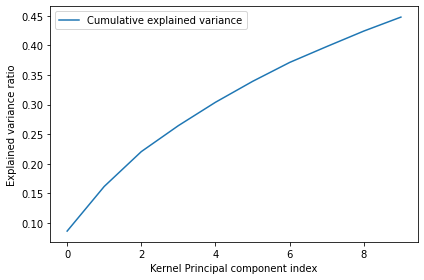

[0.08599131 0.16151965 0.22045379 0.26440756 0.30392933 0.33924431
 0.3712954  0.39816048 0.42437558 0.44798294]


In [ ]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cumsum = np.cumsum(exp_var_kpca)
# Creating the visualization plot
plt.plot(range(0,len(cumsum)),cumsum,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Kernel Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(cumsum)

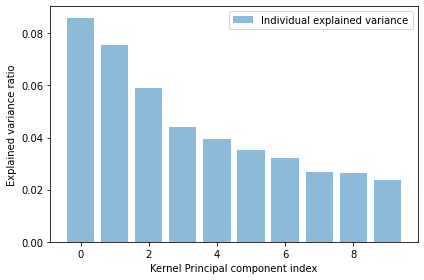

In [ ]:
plt.bar(range(0,len(exp_var_kpca)), exp_var_kpca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Kernel Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Here, explained_variance_ratio_ method of PCA is used to get the ratio of variance (eigenvalue / total eigenvalues).
Bar chart is used to represent individual explained variances.
Step plot is used to represent the variance explained by different principal components.
Data needs to be scaled before applying PCA technique.
So as we can see that I have plotted the experience variance ratio with n_components is 10 as asked in the assignment and from the Individual Explained Variance, the individual features experienced variance is plotted and the first feature  and the next variable has variance and so on. So based on this we can take 3 or 4 components in K-PCA and train our model for the data which can be used for the required model.

#REFERENCES:

For the Kpca explained variance - https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

https://iq.opengenus.org/kernal-principal-component-analysis/

This blog was refered to plot of Explained varinace and the PCA Dimensions https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html